In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

def see_plot(pict):
    plt.imshow(pict)
    plt.grid()
    plt.show()

In [632]:
%%time

cap = cv2.VideoCapture("videoplayback.mp4")
picts = []
hp = []
sp = []
i = 0
while True:
    ret,frame=cap.read()
    if not ret or i==4000:
        break
    i += 1
    #rgb_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # 718x1280
    #-----------------------------
    hp.append(detect_hp(frame))
    sp.append(detect_sp(frame))
    picts.append(frame)
    
hp_default = np.array(hp)*100
sp_default = np.array(sp)*100

sp = sp_default.copy()
sp = postproc_numbers3(sp)

CPU times: user 18.9 s, sys: 32.1 ms, total: 18.9 s
Wall time: 11.7 s


помогла статья: https://habr.com/ru/post/114589/

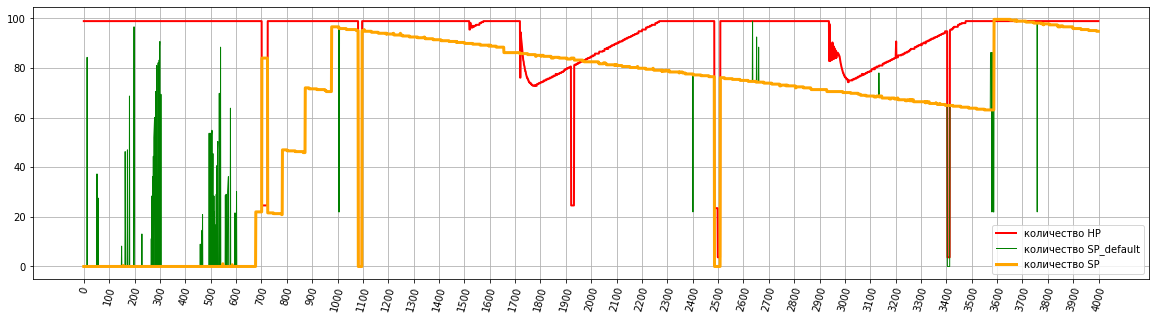

In [634]:
# заметим, что резкие падения ХП и СП на графике - косвенный признак того,
#                    что карта открыта (или вкладка с игрой свернута)
plt.figure(figsize=(20,5));
plt.plot(hp_default, color='red', label='количество HP', linewidth=2)
plt.plot(sp_default, color='green', label='количество SP_default', linewidth=1) # нужно пост-обрабатывать
plt.plot(sp, color='orange', label='количество SP', linewidth=3)
plt.xticks(range(0,4100,100), rotation=75)

#plt.xlim(3400,3450)

plt.grid()
plt.legend();

In [255]:
detect_sp(picts[1950]), detect_hp(picts[1950])

(0.832, 0.821)

In [612]:
detect_sp(picts[977]), detect_hp(picts[680])

(0.966, 0.989)